In [1]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
library(tidyverse)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [4]:
library(readxl)

In [5]:
# import data
df_adult<-read.csv("adult.csv")

In [6]:
head(df_adult)

age,workclass,fnlwgt,education,educational.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [26]:
# structure of data frame
str(df_adult)

'data.frame':	48842 obs. of  15 variables:
 $ age            : int  25 38 28 44 18 34 29 63 24 55 ...
 $ workclass      : Factor w/ 9 levels "?","Federal-gov",..: 5 5 3 5 1 5 1 7 5 5 ...
 $ final_wage     : int  226802 89814 336951 160323 103497 198693 227026 104626 369667 104996 ...
 $ education      : Factor w/ 16 levels "10th","11th",..: 2 12 8 16 16 1 12 15 16 6 ...
 $ educational_num: int  7 9 12 10 10 6 9 15 10 4 ...
 $ marital_status : Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 3 3 5 5 5 3 5 3 ...
 $ occupation     : Factor w/ 15 levels "?","Adm-clerical",..: 8 6 12 8 1 9 1 11 9 4 ...
 $ relationship   : Factor w/ 6 levels "Husband","Not-in-family",..: 4 1 1 1 4 2 5 1 5 1 ...
 $ race           : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 3 5 5 3 5 5 3 5 5 5 ...
 $ gender         : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 2 2 2 1 2 ...
 $ capital_gain   : int  0 0 0 7688 0 0 0 3103 0 0 ...
 $ capital_loss   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours_per_week : i

In [7]:
# column names
names(df_adult)

[1] "age"             "workclass"       "fnlwgt"          "education"      
 [5] "educational.num" "marital.status"  "occupation"      "relationship"   
 [9] "race"            "gender"          "capital.gain"    "capital.loss"   
[13] "hours.per.week"  "native.country"  "income"

In [23]:
# Rename column names
df_adult<-df_adult %>% 
      rename(
        final_wage = fnlwgt,
        educational_num = educational.num,
        marital_status=marital.status,
        capital_gain=capital.gain,
        capital_loss=capital.loss,
        hours_per_week=hours.per.week,
        native_country=native.country)

In [24]:
# dimension of dataset
dim(df_adult)

[1] 48842    15

In [25]:
# summary of data sets
summary(df_adult)

      age                   workclass       final_wage     
 Min.   :17.00   Private         :33906   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 3862   1st Qu.: 117551  
 Median :37.00   Local-gov       : 3136   Median : 178145  
 Mean   :38.64   ?               : 2799   Mean   : 189664  
 3rd Qu.:48.00   State-gov       : 1981   3rd Qu.: 237642  
 Max.   :90.00   Self-emp-inc    : 1695   Max.   :1490400  
                 (Other)         : 1463                    
        education     educational_num               marital_status 
 HS-grad     :15784   Min.   : 1.00   Divorced             : 6633  
 Some-college:10878   1st Qu.: 9.00   Married-AF-spouse    :   37  
 Bachelors   : 8025   Median :10.00   Married-civ-spouse   :22379  
 Masters     : 2657   Mean   :10.08   Married-spouse-absent:  628  
 Assoc-voc   : 2061   3rd Qu.:12.00   Never-married        :16117  
 11th        : 1812   Max.   :16.00   Separated            : 1530  
 (Other)     : 7625                   Widowe

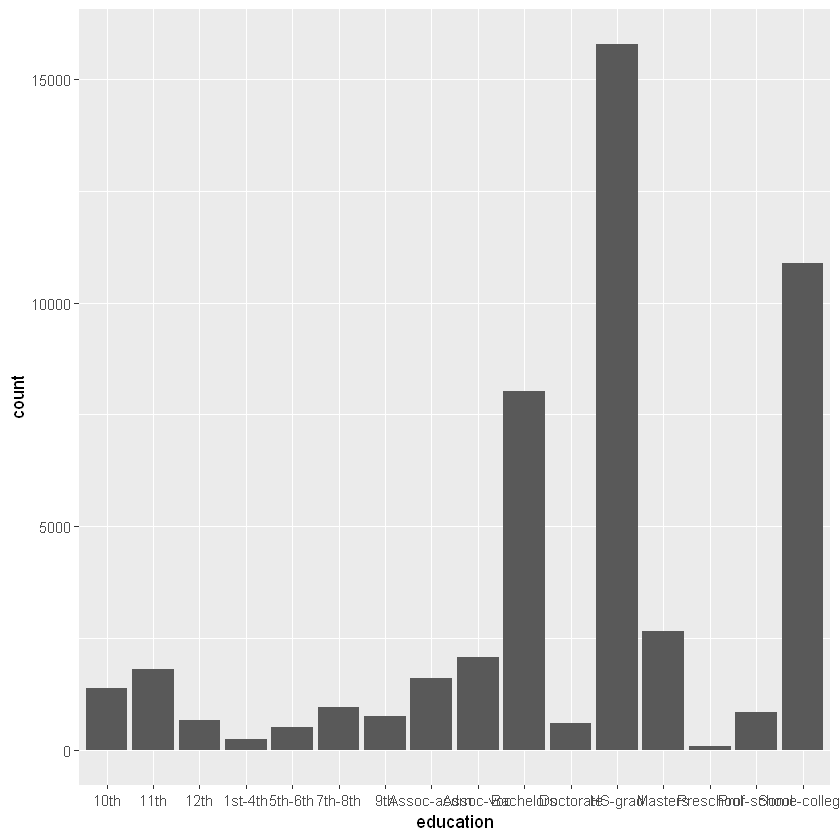

In [32]:

ggplot(df_adult,aes(x=education))+geom_bar()

In [38]:
prop.table(table(df_adult$education))



        10th         11th         12th      1st-4th      5th-6th      7th-8th 
 0.028438639  0.037099218  0.013451538  0.005057123  0.010421359  0.019552844 
         9th   Assoc-acdm    Assoc-voc    Bachelors    Doctorate      HS-grad 
 0.015478482  0.032779165  0.042197289  0.164305311  0.012161664  0.323164490 
     Masters    Preschool  Prof-school Some-college 
 0.054399902  0.001699357  0.017075468  0.222718152 

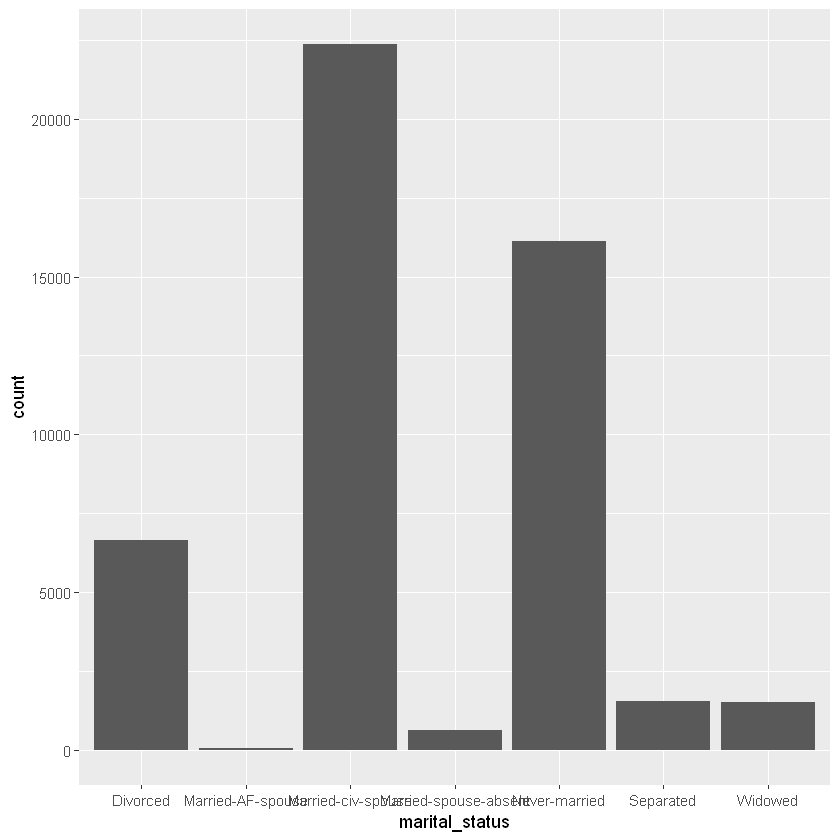

In [34]:
ggplot(df_adult,aes(x=marital_status))+geom_bar()

In [41]:
prop.table(table(df_adult$marital_status))


             Divorced     Married-AF-spouse    Married-civ-spouse 
         0.1358052496          0.0007575447          0.4581917202 
Married-spouse-absent         Never-married             Separated 
         0.0128577863          0.3299823922          0.0313254985 
              Widowed 
         0.0310798084 

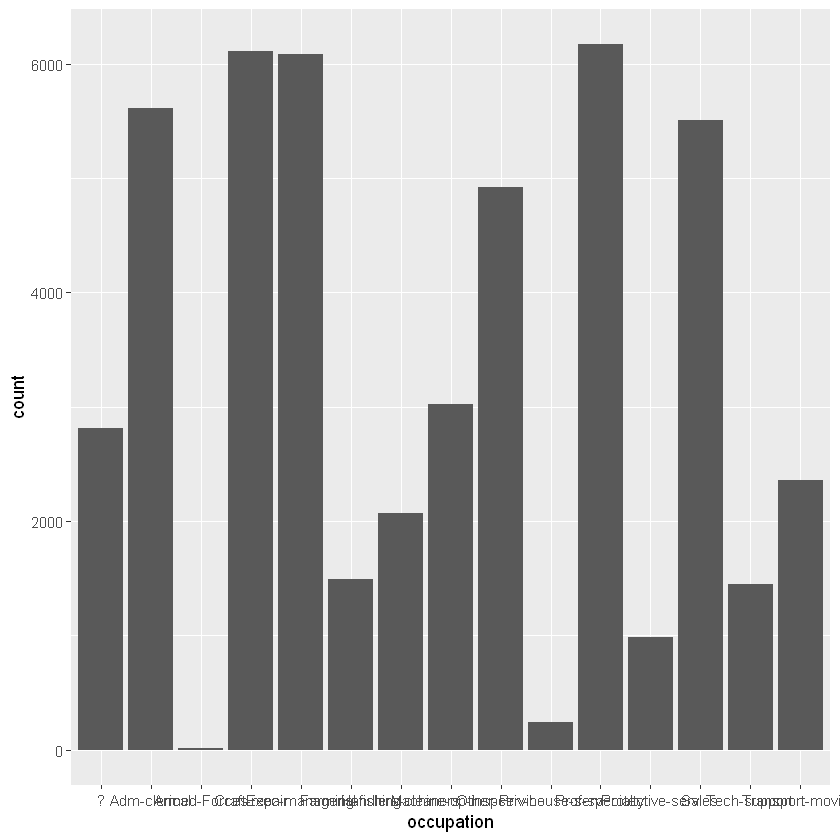

In [35]:
ggplot(df_adult,aes(x=occupation))+geom_bar()

In [42]:
prop.table(table(df_adult$occupation))


                ?      Adm-clerical      Armed-Forces      Craft-repair 
     0.0575119774      0.1148806355      0.0003071127      0.1251382007 
  Exec-managerial   Farming-fishing Handlers-cleaners Machine-op-inspct 
     0.1246058720      0.0305065313      0.0424225052      0.0618729782 
    Other-service   Priv-house-serv    Prof-specialty   Protective-serv 
     0.1007943983      0.0049547521      0.1263666517      0.0201261210 
            Sales      Tech-support  Transport-moving 
     0.1126898980      0.0296056673      0.0482166987 

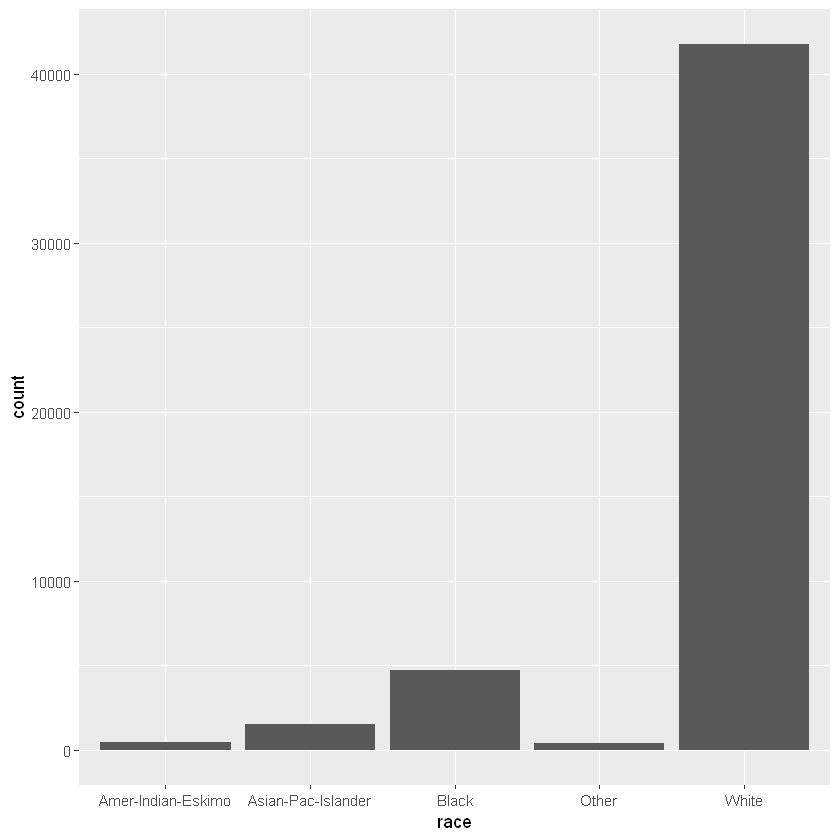

In [36]:
ggplot(df_adult,aes(x=race))+geom_bar()

In [43]:
prop.table(table(df_adult$race))


Amer-Indian-Eskimo Asian-Pac-Islander              Black              Other 
       0.009622866        0.031100283        0.095921543        0.008312518 
             White 
       0.855042791 

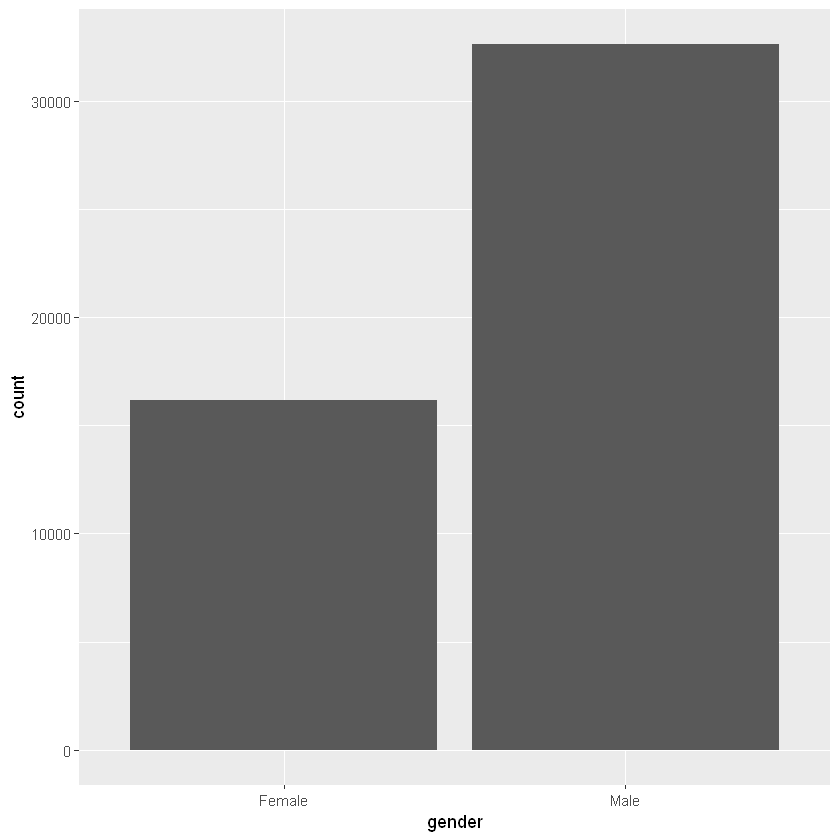

In [37]:
ggplot(df_adult,aes(x=gender))+geom_bar()

In [44]:
prop.table(table(df_adult$gender))


  Female     Male 
0.331518 0.668482 

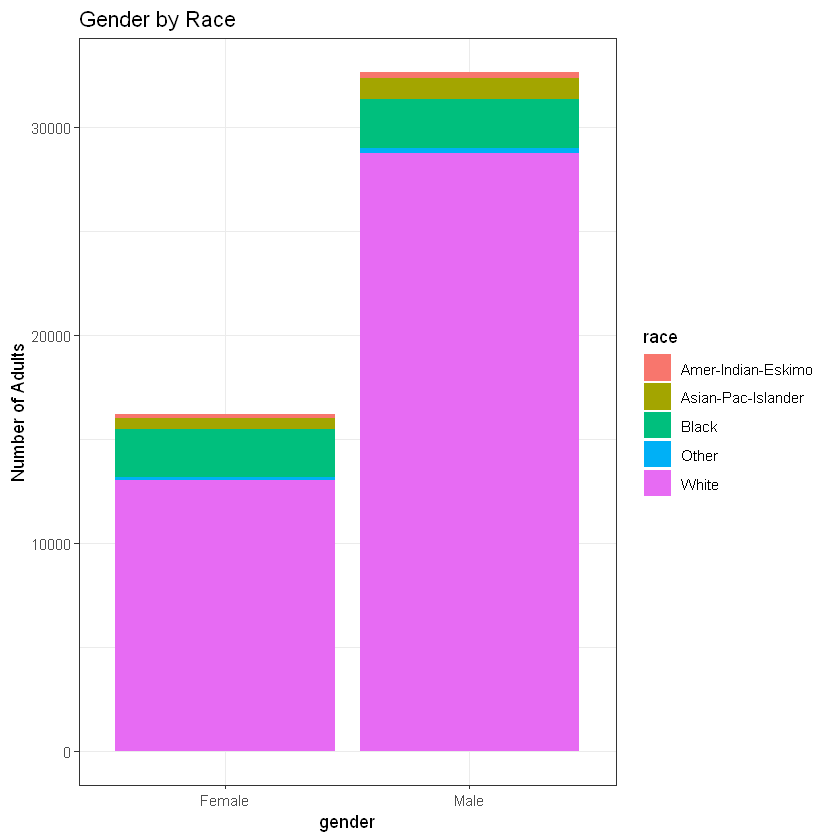

In [46]:
ggplot(df_adult,aes(x=gender,fill=race))+theme_bw()+geom_bar()+labs(y="Number of Adults",title="Gender by Race")

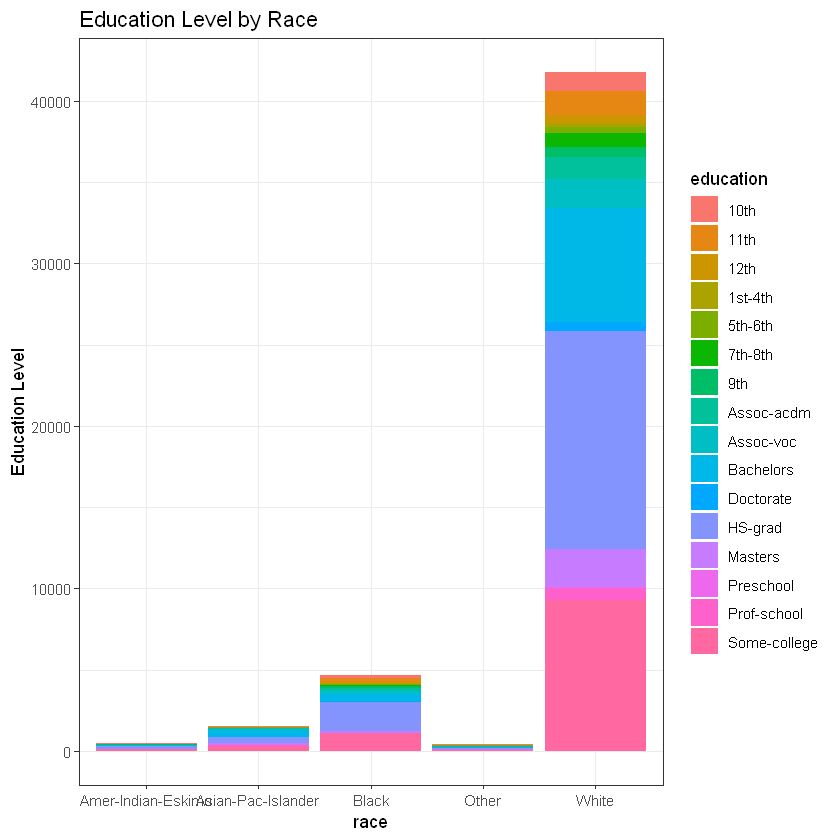

In [48]:
ggplot(df_adult,aes(x=race,fill=education))+theme_bw()+geom_bar()+labs(y="Education Level",title="Education Level by Race")

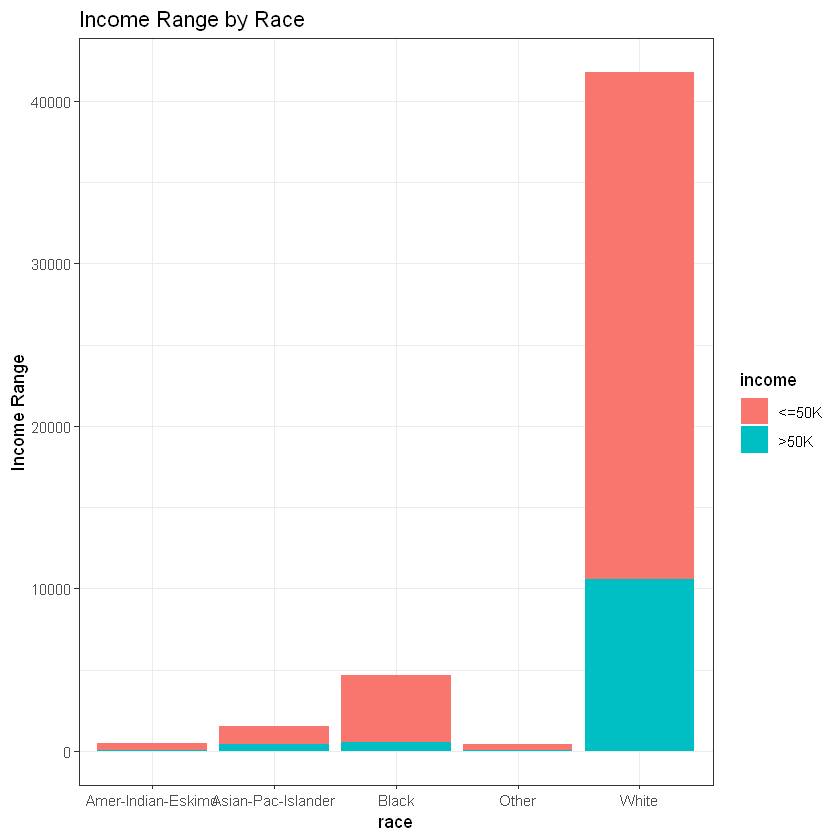

In [50]:
ggplot(df_adult,aes(x=race,fill=income))+theme_bw()+geom_bar()+labs(y="Income Range",title="Income Range by Race")

In [63]:
# group age into 5 bins
df_18_group<-df_18%>%
    mutate(age_bin=cut_number(age,n=4,label=c("18-35","36-55","56-65","> 65")))

df_18_group%>%
    count(age_bin)

age_bin,n
18-35,12697
36-55,11682
56-65,12347
> 65,11521


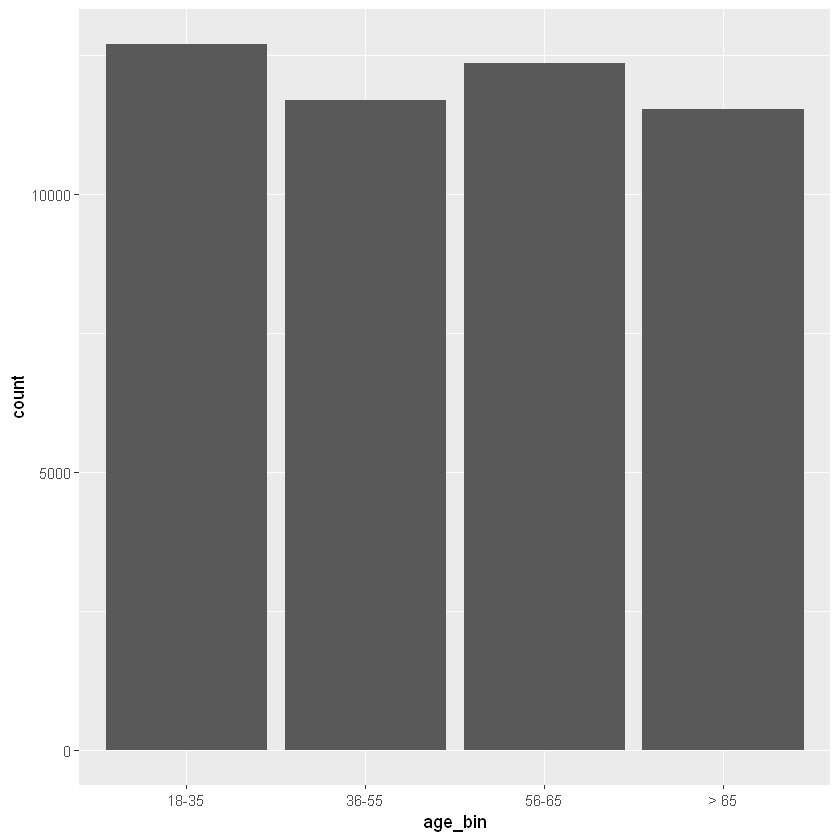

In [65]:
# bar graph of age_bin
ggplot(df_18_group,aes(x=age_bin))+geom_bar()

In [75]:
# average age by gender
df_18%>%
    group_by(race)%>%
    summarize(average_age=mean(age,na.rm=T))

race,gender,average_age
Amer-Indian-Eskimo,Female,36.66298
Amer-Indian-Eskimo,Male,37.13074
Asian-Pac-Islander,Female,35.73010
Asian-Pac-Islander,Male,38.99401
Black,Female,38.07951
Black,Male,38.15398
Other,Female,31.78523
Other,Male,35.31325
White,Female,37.29421
White,Male,39.91987


In [76]:
# group_by race, gender and find average age
df_18%>%
    group_by(race,gender)%>%
    summarize(average_age=mean(age,na.rm=T))

race,gender,average_age
Amer-Indian-Eskimo,Female,36.66298
Amer-Indian-Eskimo,Male,37.13074
Asian-Pac-Islander,Female,35.73010
Asian-Pac-Islander,Male,38.99401
Black,Female,38.07951
Black,Male,38.15398
Other,Female,31.78523
Other,Male,35.31325
White,Female,37.29421
White,Male,39.91987


In [73]:
colnames(df_18)

[1] "age"             "workclass"       "final_wage"      "education"      
 [5] "educational_num" "marital_status"  "occupation"      "relationship"   
 [9] "race"            "gender"          "capital_gain"    "capital_loss"   
[13] "hours_per_week"  "native_country"  "income"

In [78]:
# find average final_wage, education_num, hours_per_week, income
df_18%>%
    group_by(gender)%>%
    summarize(avg_age=mean(age,na.rm=T),
             avg_wage=mean(final_wage,na.rm=T),
             avg_edu=mean(educational_num,na.rm=T),
             avg_hours=mean(hours_per_week,na.rm=T))

gender,avg_age,avg_wage,avg_edu,avg_hours
Female,37.29779,185791.1,10.10467,36.71649
Male,39.70300,191760.6,10.12742,42.59818


In [84]:
# group by age and gender to get average wage, education, hour per week, 
df_18_group%>%
    group_by(gender,age_bin)%>%
    summarize(avg_age=mean(age,na.rm=T),
    avg_wage=mean(final_wage,na.rm=T),
    avg_edu=mean(educational_num,na.rm=T),
    avg_hours=mean(hours_per_week,na.rm=T))

gender,age_bin,avg_age,avg_wage,avg_edu,avg_hours
Female,18-35,22.86779,192725.3,10.039720,33.79970
Female,36-55,32.91204,189858.4,10.337468,38.91880
Female,56-65,42.75648,180935.1,10.435162,39.45263
Female,> 65,58.43088,175997.1,9.606765,36.00676
Male,18-35,23.51970,204612.5,9.607152,38.67368
Male,36-55,33.10129,196478.5,10.234542,44.67843
Male,56-65,42.72950,189042.4,10.655343,45.16617
Male,> 65,57.84620,178214.4,9.930304,41.34922


In [ ]:
It shows that male worked more hours per week than female.

In [85]:
df_18%>%
    gather(key=age,final_wage,educational_num,hours_per_week)

workclass,education,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,native_country,income,age,final_wage
Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,United-States,<=50K,educational_num,7
Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,United-States,<=50K,educational_num,9
Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,United-States,>50K,educational_num,12
Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,United-States,>50K,educational_num,10
?,Some-college,Never-married,?,Own-child,White,Female,0,0,United-States,<=50K,educational_num,10
Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,United-States,<=50K,educational_num,6
?,HS-grad,Never-married,?,Unmarried,Black,Male,0,0,United-States,<=50K,educational_num,9
Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,United-States,>50K,educational_num,15
Private,Some-college,Never-married,Other-service,Unmarried,White,Female,0,0,United-States,<=50K,educational_num,10
Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,United-States,<=50K,educational_num,4


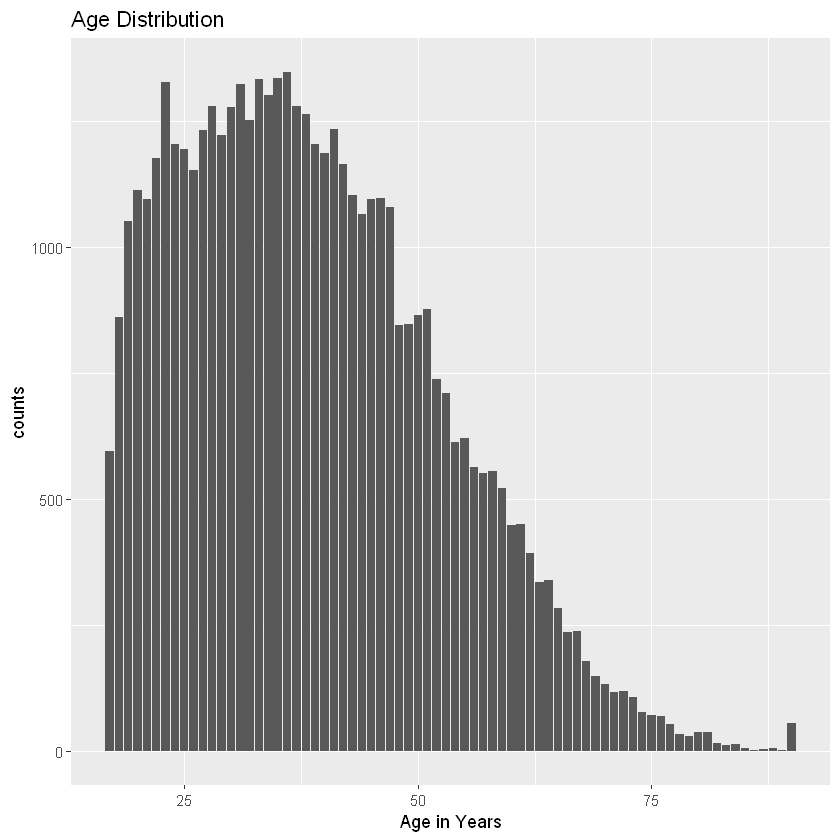

In [86]:
df_adult%>%
    ggplot()+
    geom_bar(aes(x=age))+
    ggtitle("Age Distribution")+
    xlab("Age in Years")+
    ylab("counts")

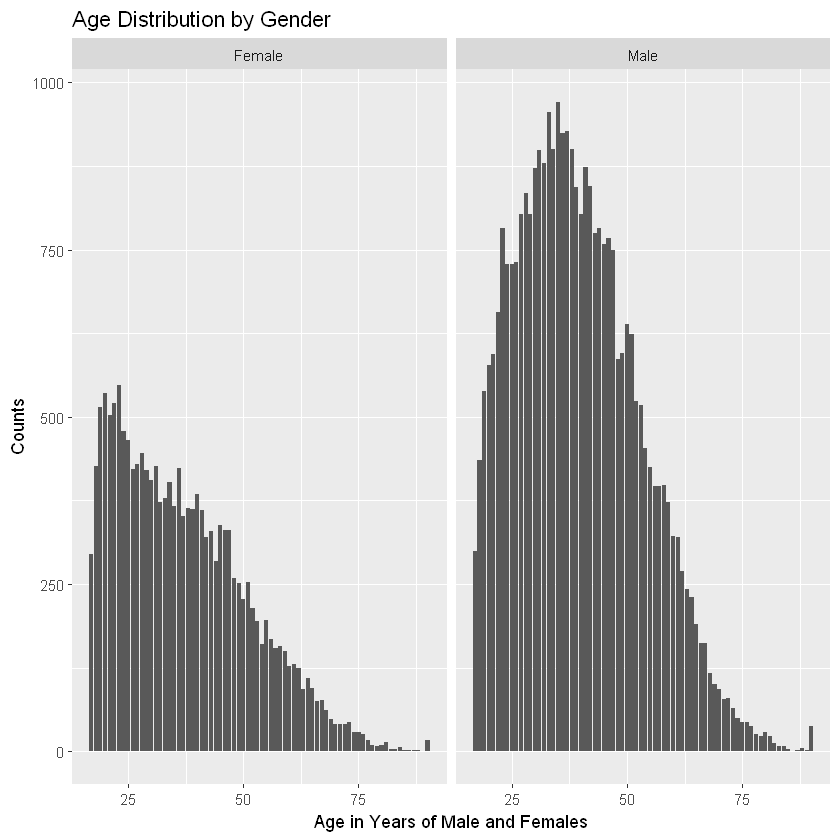

In [88]:
# Age distribution by gender
df_adult%>%
    ggplot()+
    geom_bar(aes(x=age))+
    facet_wrap(~gender)+
    ggtitle("Age Distribution by Gender")+
    xlab("Age in Years of Male and Females")+
    ylab("Counts")
    

It shows that there are more males than females.

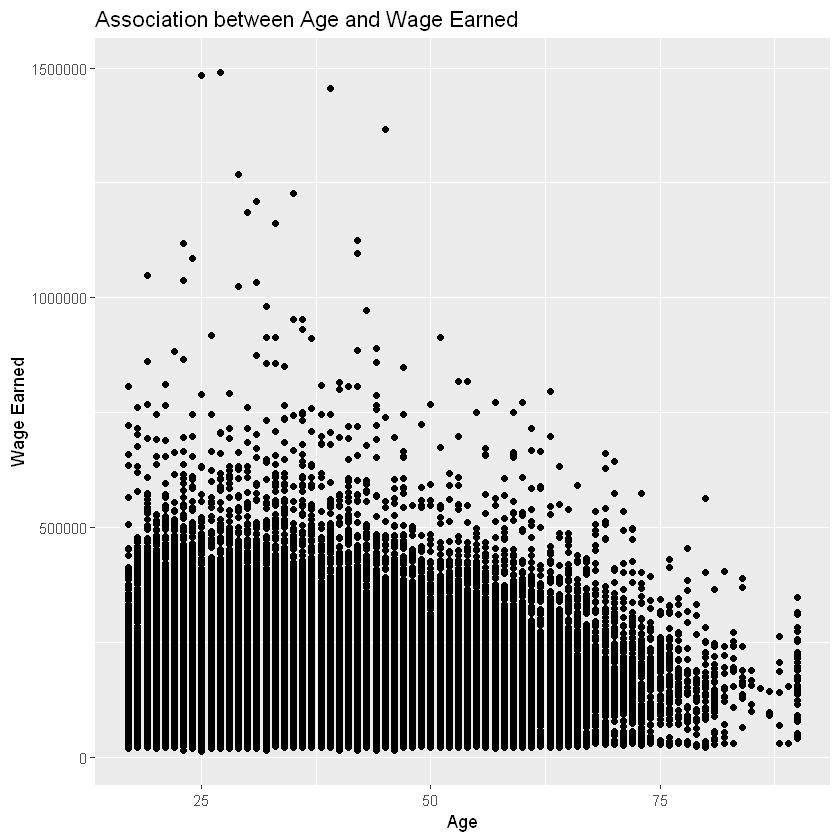

In [93]:
# Age vs final_wage
df_adult%>%
    ggplot()+
    geom_point(aes(x=age,y=final_wage))+
    ggtitle("Association between Age and Wage Earned")+
    xlab("Age")+
    ylab("Wage Earned")

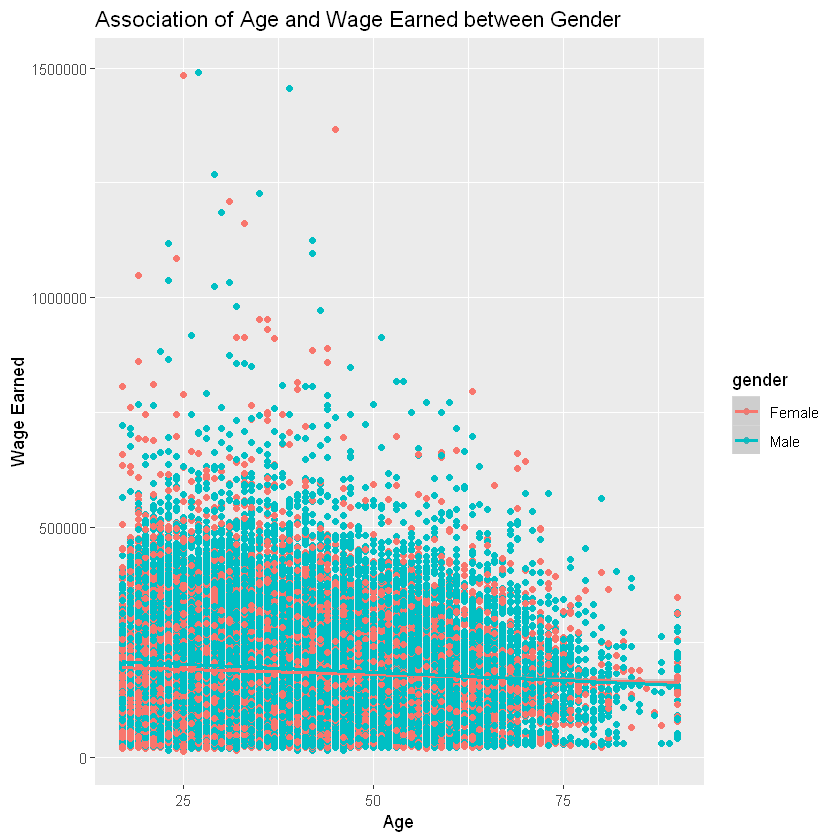

In [101]:
# Association between Age and Wage Earned between different gender
df_adult%>%
    mutate(gender = as.factor(gender)) %>%
    ggplot()+
    geom_point(aes(x=age,y=final_wage,color=gender))+
    geom_smooth(aes(x=age,y=final_wage,color=gender),method="lm")+
    ggtitle("Association of Age and Wage Earned between Gender")+
    xlab("Age")+
    ylab("Wage Earned")  

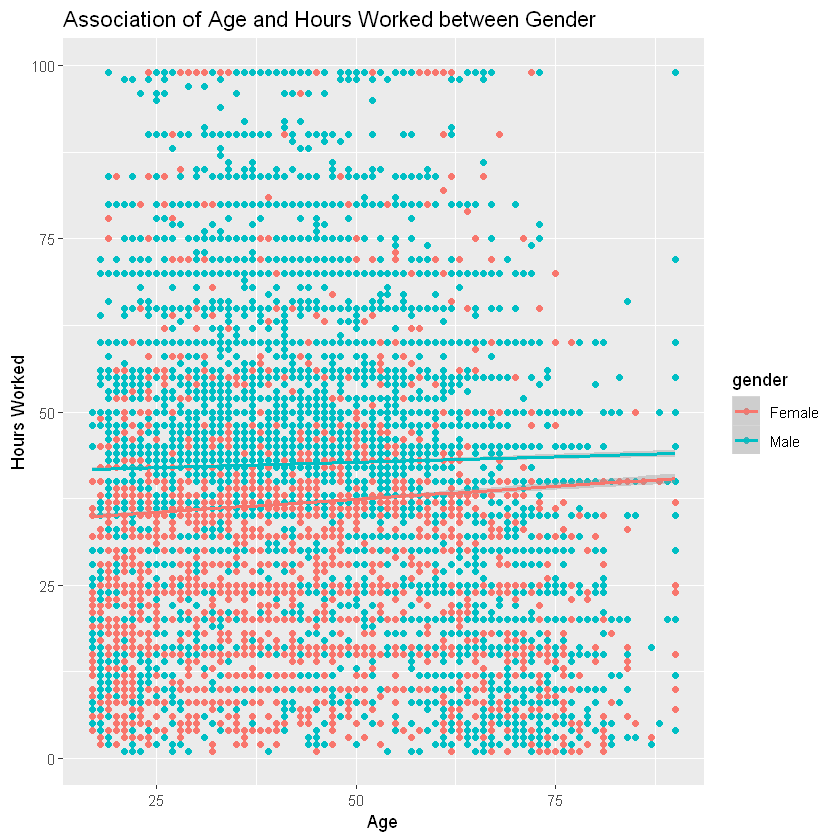

In [103]:
# Association between Age and Hours Worked between different gender
df_adult%>%
    mutate(gender = as.factor(gender)) %>%
    ggplot()+
    geom_point(aes(x=age,y=hours_per_week,color=gender))+
    geom_smooth(aes(x=age,y=hours_per_week,color=gender),method="lm")+
    ggtitle("Association of Age and Hours Worked between Gender")+
    xlab("Age")+
    ylab("Hours Worked")  

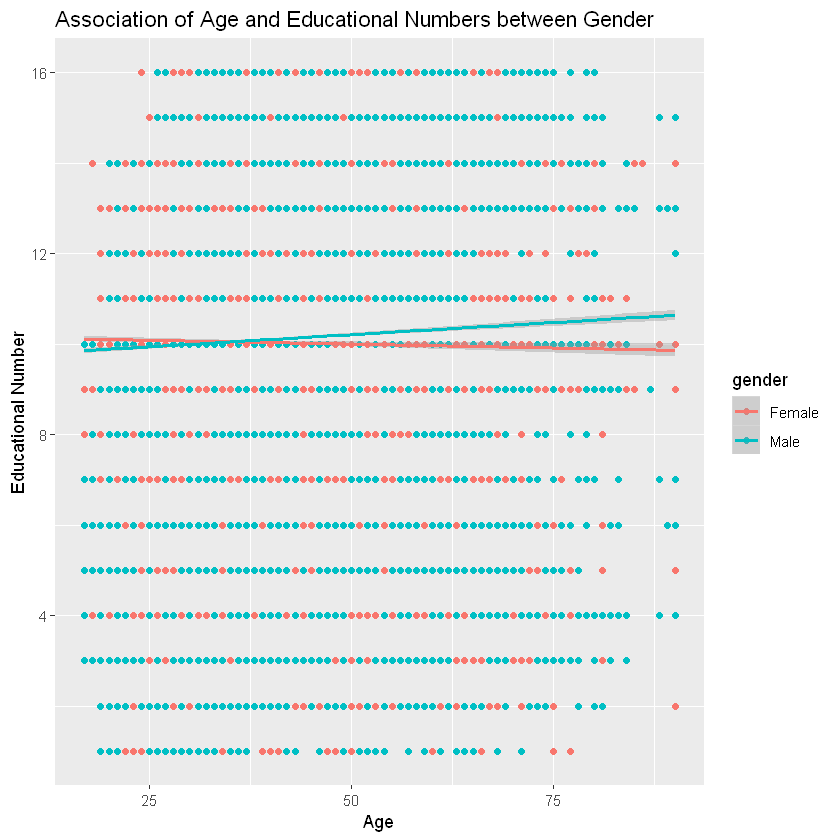

In [105]:
# Association between Age and educational number between different gender
df_adult%>%
    mutate(gender = as.factor(gender)) %>%
    ggplot()+
    geom_point(aes(x=age,y=educational_num,color=gender))+
    geom_smooth(aes(x=age,y=educational_num,color=gender),method="lm")+
    ggtitle("Association of Age and Educational Numbers between Gender")+
    xlab("Age")+
    ylab("Educational Number")  

In [107]:
# Age vs final wage 
lmWage=lm(final_wage~age,data=df_adult)
summary(lmHeight)


Call:
lm(formula = final_wage ~ age, data = df_adult)

Residuals:
    Min      1Q  Median      3Q     Max 
-185432  -71731  -10655   48274 1293864 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 212472.40    1424.90  149.11   <2e-16 ***
age           -590.22      34.75  -16.98   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 105300 on 48840 degrees of freedom
Multiple R-squared:  0.005872,	Adjusted R-squared:  0.005852 
F-statistic: 288.5 on 1 and 48840 DF,  p-value: < 2.2e-16


Final_wage = a + age(b)
The intercept(a) is 21247.40 and slope(b) is -590.22, so the linear model is y = a + age(b)
Since age has P-value of 2e-16, which 2 * 10^(-16), age  is good predictor of final wage.

In [108]:
# linear regression between three variables
# age, hours_per_week, final_wage
lmWage_1=lm(final_wage~age+hours_per_week,data=df_adult)
summary(lmWage_1)


Call:
lm(formula = final_wage ~ age + hours_per_week, data = df_adult)

Residuals:
    Min      1Q  Median      3Q     Max 
-186777  -71795  -10635   48147 1293886 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    215082.74    2041.38 105.362   <2e-16 ***
age              -585.77      34.84 -16.814   <2e-16 ***
hours_per_week    -68.83      38.55  -1.786   0.0742 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 105300 on 48839 degrees of freedom
Multiple R-squared:  0.005937,	Adjusted R-squared:  0.005896 
F-statistic: 145.8 on 2 and 48839 DF,  p-value: < 2.2e-16


In [ ]:
Since P-value of hours_per_week is not less than 0.0742, hours_per_week is not the good predictor of final wage.


In [ ]:
ggplot(df_adult,aes(x=age,fill=final_wage))+theme_bw()+facet_wrap()geom_bar()+labs(y="Income Range",title="Income Range by Race")

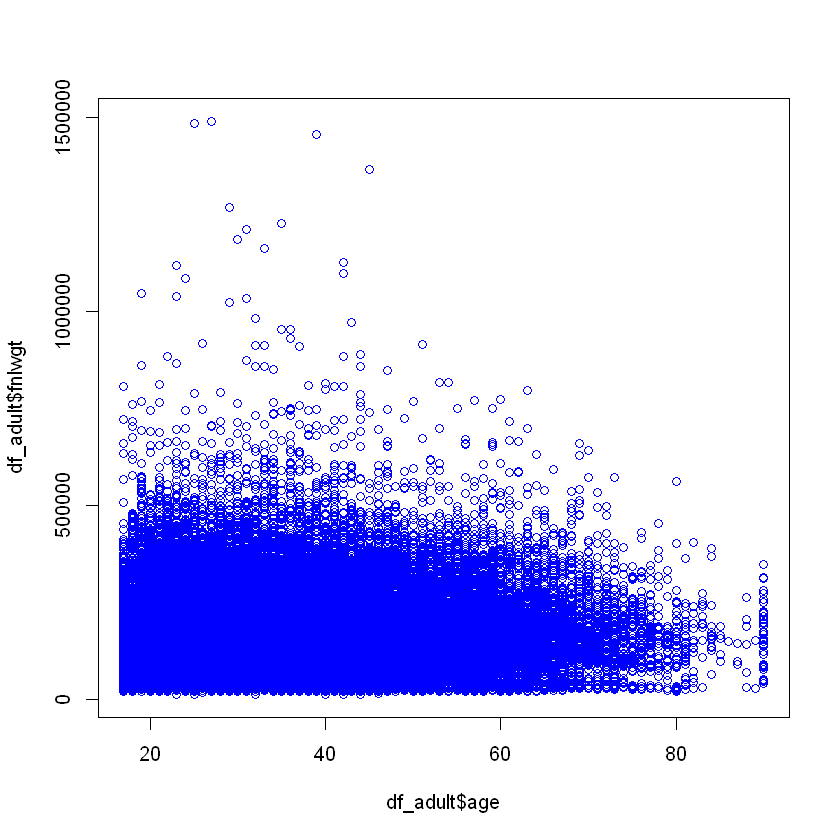

In [19]:
# visualization of age and final wage 
plot(df_adult$age,df_adult$fnlwgt,type="p",col="blue")

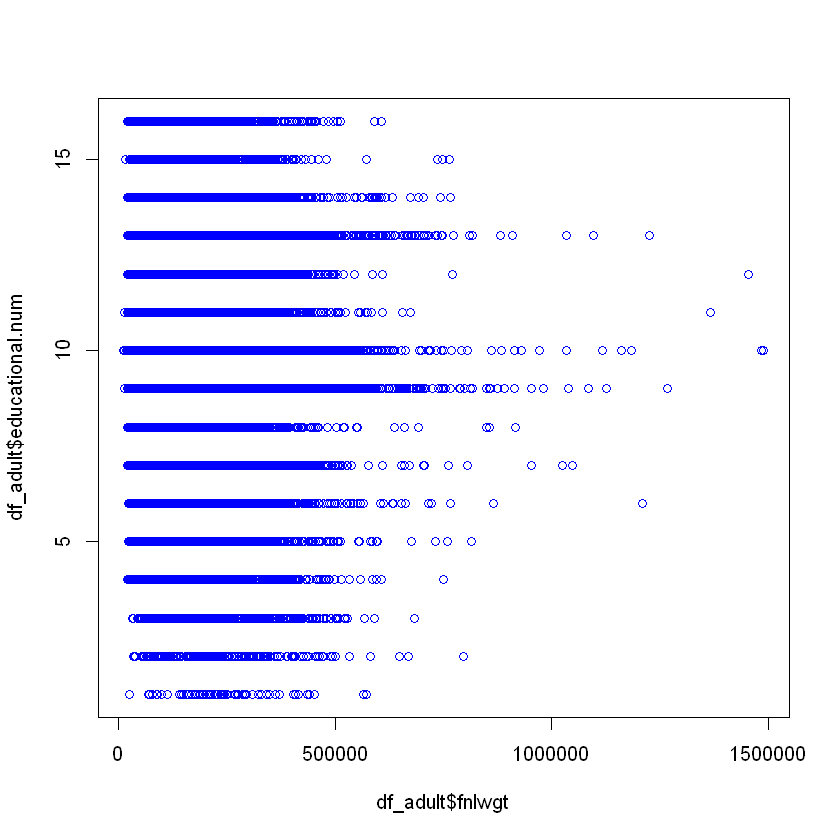

In [32]:
# plot of educational level and wage 
plot(df_adult$fnlwgt,df_adult$educational.num,type="p",col="blue")

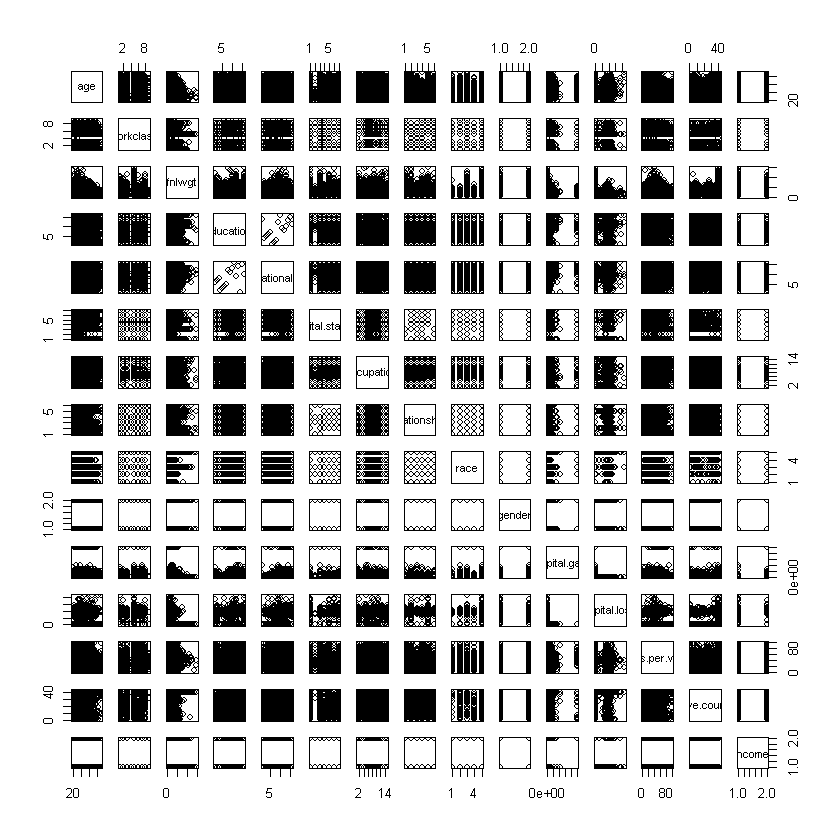

In [33]:
# pair wise plot
pairs(df_adult)

In [34]:
install.packages("corrplot")


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.89             FALSE



installing the source package 'corrplot'



In [35]:
# get columns that have only numeric values
num.cols<-sapply(df_adult,is.numeric)

In [36]:
num.cols

age       workclass          fnlwgt       education educational.num 
           TRUE           FALSE            TRUE           FALSE            TRUE 
 marital.status      occupation    relationship            race          gender 
          FALSE           FALSE           FALSE           FALSE           FALSE 
   capital.gain    capital.loss  hours.per.week  native.country          income 
           TRUE            TRUE            TRUE           FALSE           FALSE

In [39]:
#correlation of numeric columns
corr.cols<-cor(df_adult[,num.cols])

In [40]:
corr.cols

,age,fnlwgt,educational.num,capital.gain,capital.loss,hours.per.week
age,1.00000000,-0.076628079,0.03094038,0.077229022,0.05694383,0.07155834
fnlwgt,-0.07662808,1.000000000,-0.03876068,-0.003706389,-0.00436615,-0.01351871
educational.num,0.03094038,-0.038760684,1.00000000,0.125146459,0.08097194,0.14368891
capital.gain,0.07722902,-0.003706389,0.12514646,1.000000000,-0.03144077,0.08215728
capital.loss,0.05694383,-0.004366150,0.08097194,-0.031440771,1.00000000,0.05446722
hours.per.week,0.07155834,-0.013518715,0.14368891,0.082157278,0.05446722,1.00000000


In [47]:
library(corrplot)

corrplot 0.89 loaded


In [51]:
cor(df_adult$age,df_adult$hours.per.week)

[1] 0.07155834